# **Problem Statment**

Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [ ]:
df=pd.read_csv('Fraud_check.csv')

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# **Performing EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

**As we can see above there are no null values in our dataset.**

<Axes: >

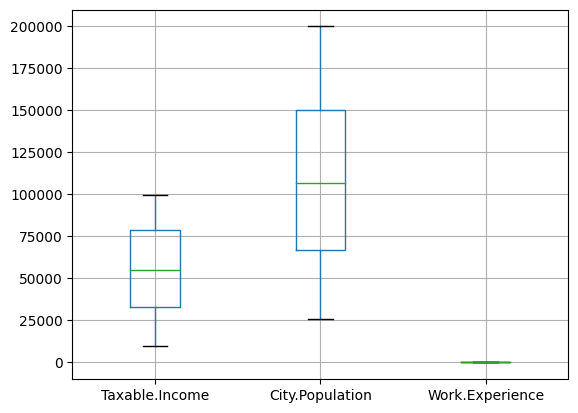

In [ ]:
df.boxplot()

**As we can see above there are no outliers in our dataset.**

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


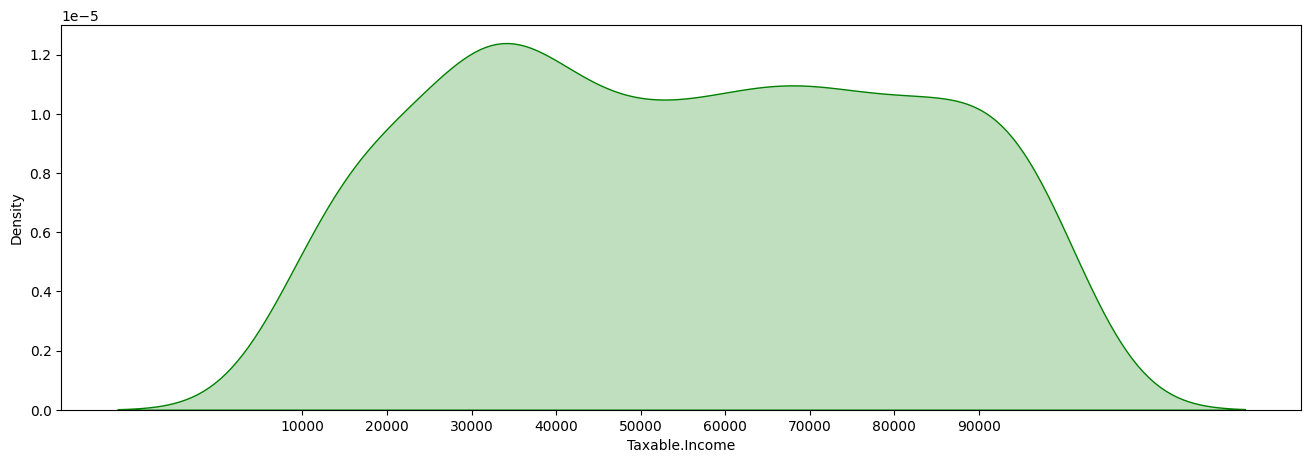

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

**The data is Skwed on the righ**t

**The data has negative Kurtosis**

In [ ]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

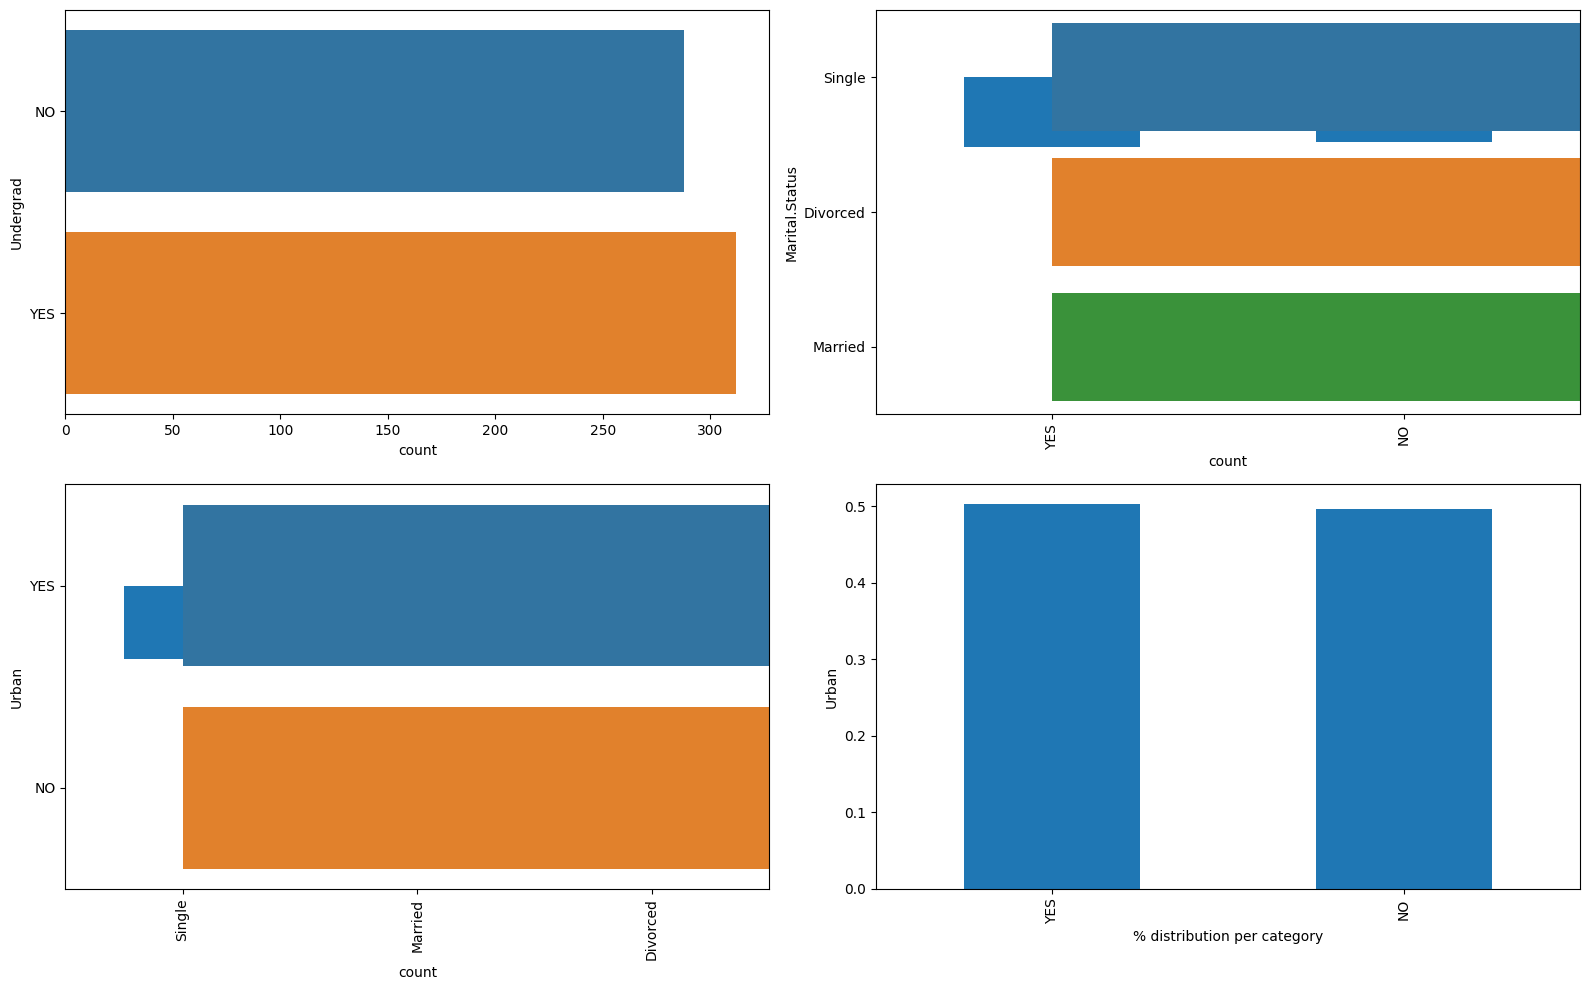

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

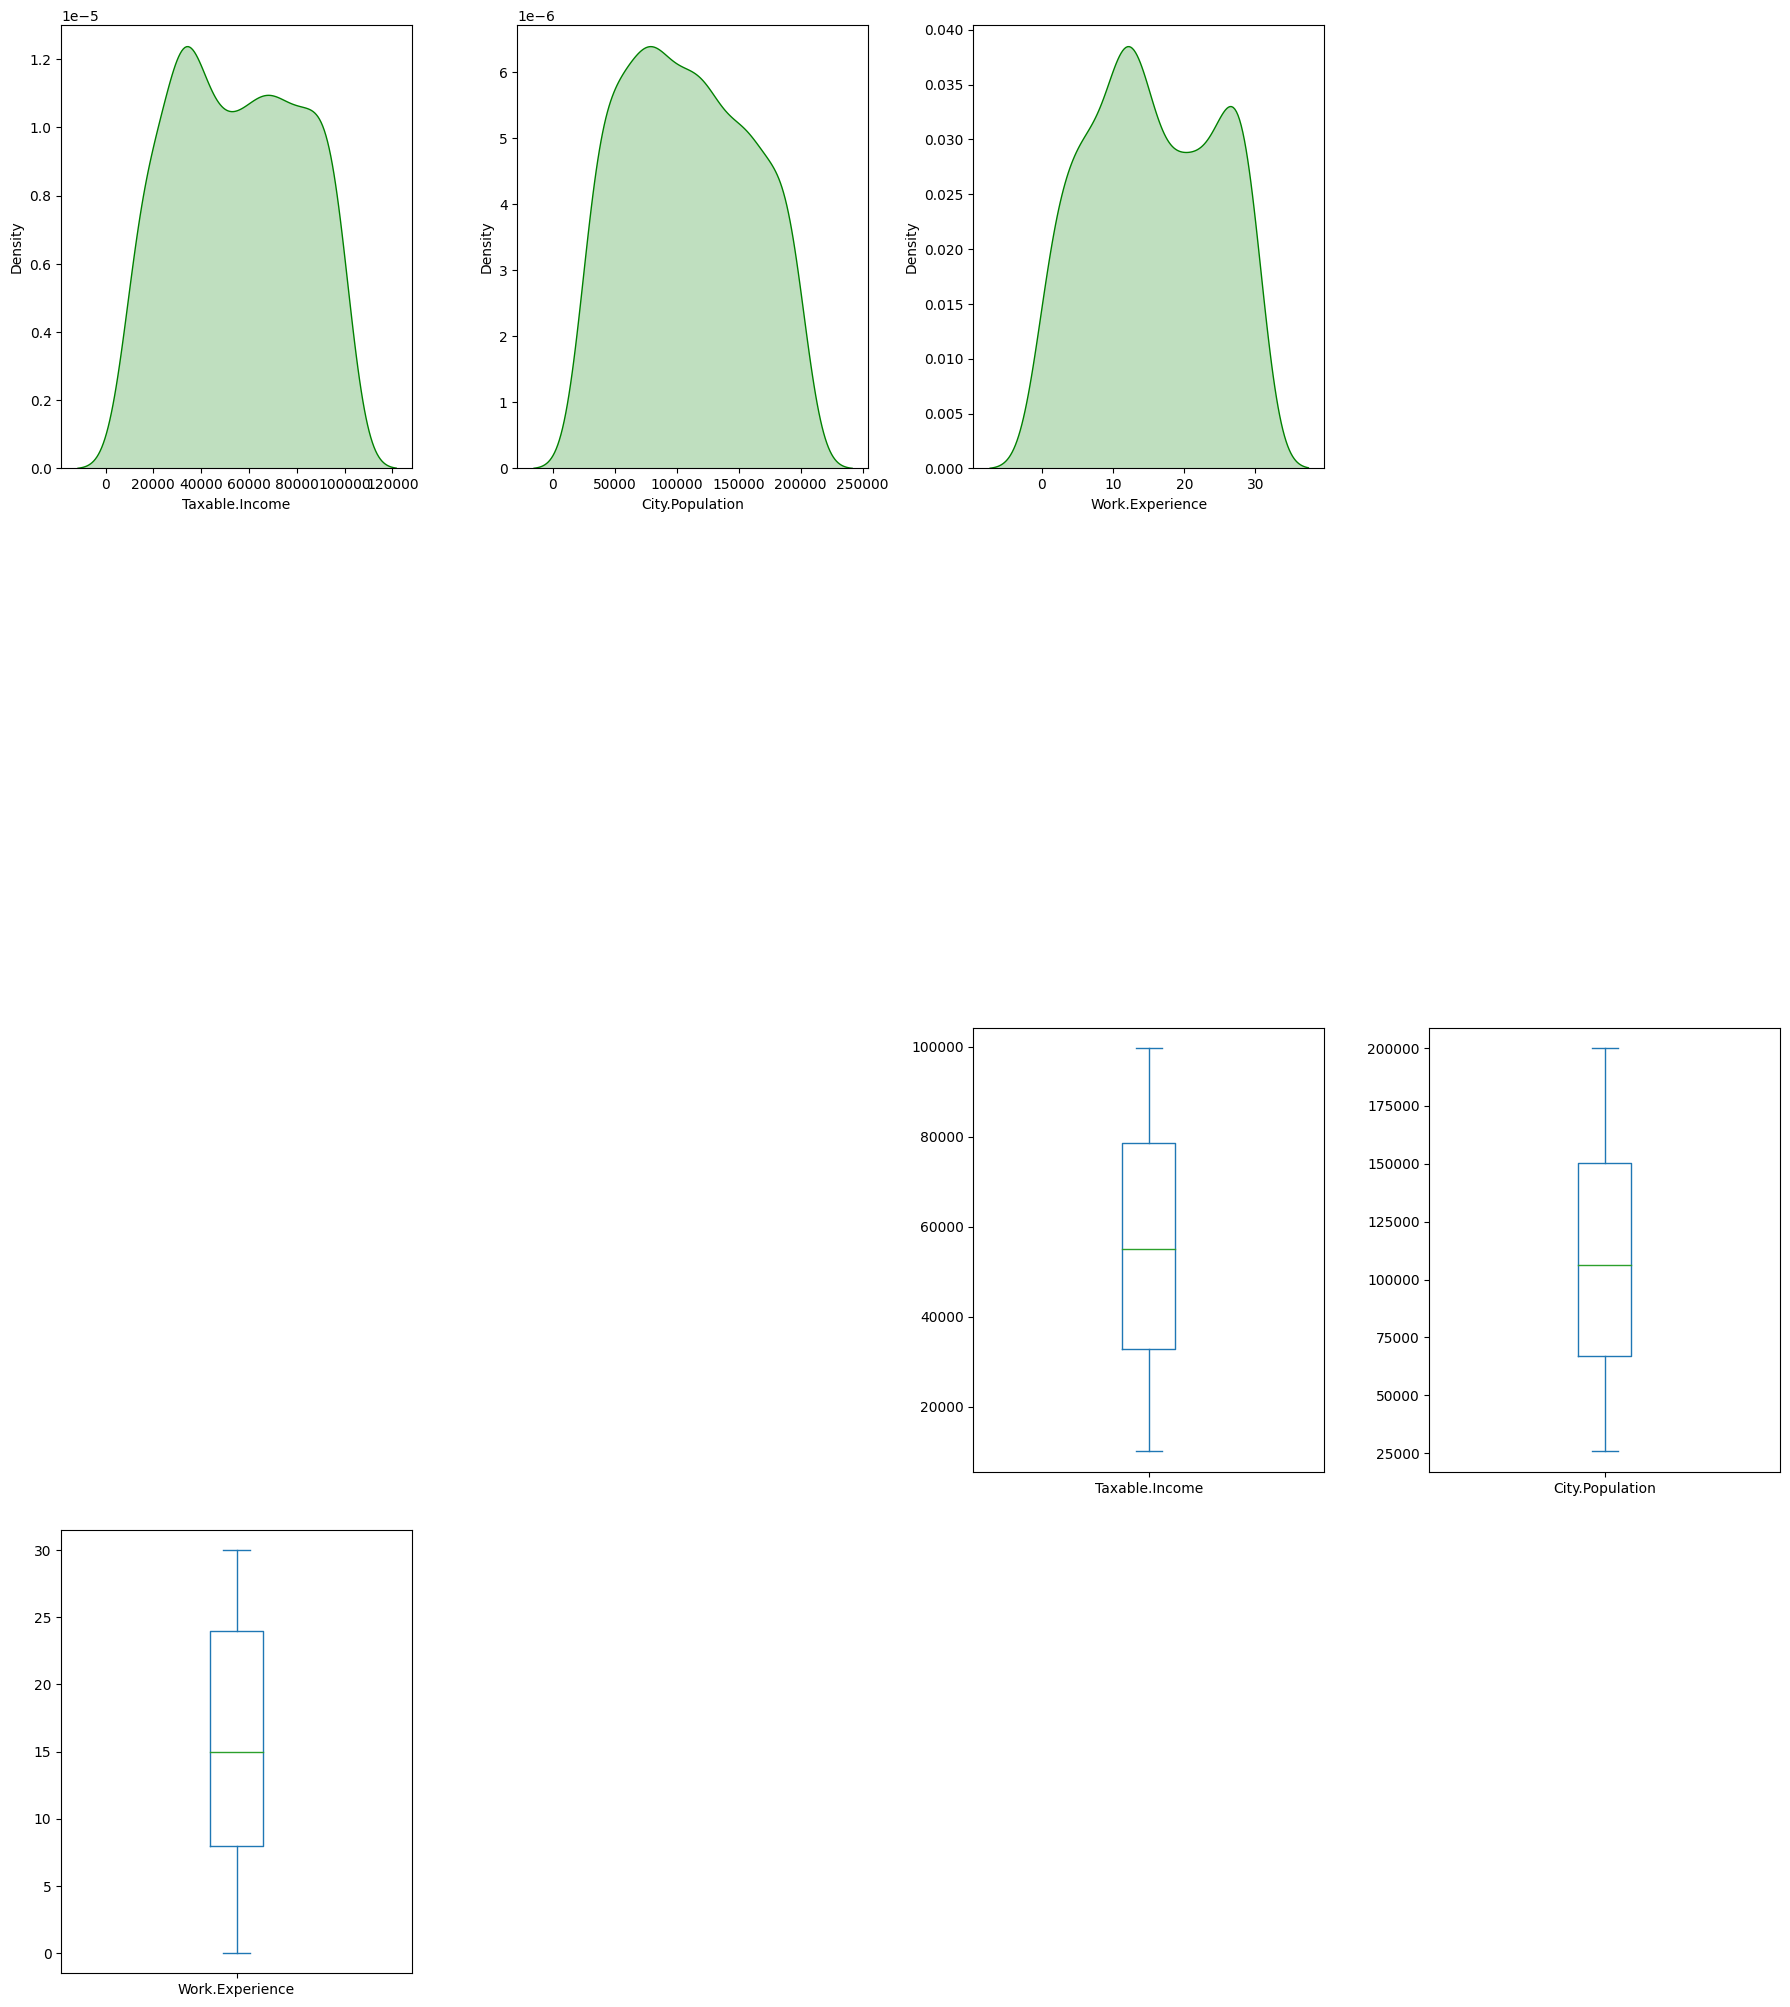

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
df1 = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

In [ ]:
corr = df1.corr()

<Axes: >

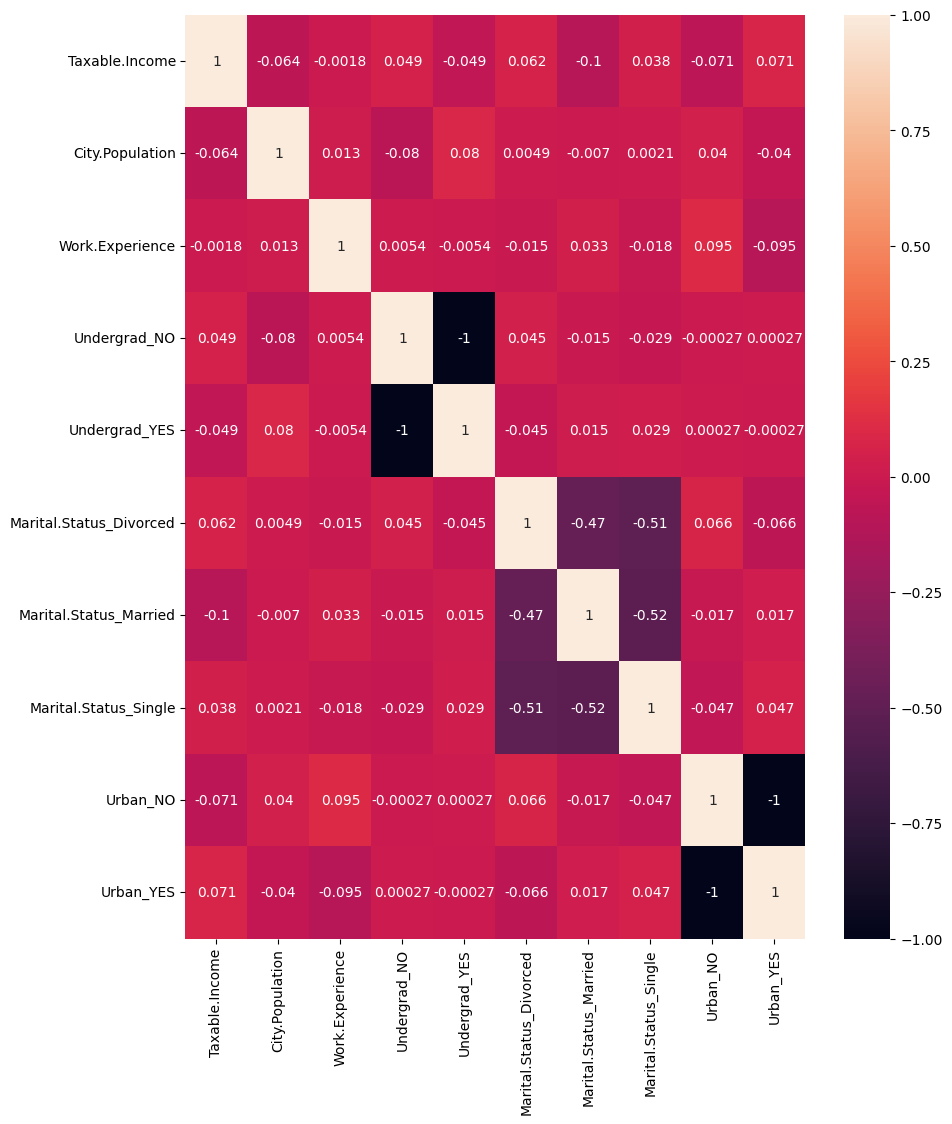

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot = True)

**Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"**

In [ ]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [ ]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

# **Splitting the data into Train and Test**

In [ ]:
x = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [ ]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [ ]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [ ]:
y.value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

**As we can see our target column is imbalanced so we have to make that balanced by using SMOTE for better Model Accuracy.**

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_resampled,y_resampled=SMOTE().fit_resample(x,y)

In [ ]:
x_resampled

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
947,140855,11,0,0,0,0,0,0,0
948,89592,16,0,1,0,0,1,0,1
949,128988,3,0,0,0,0,0,0,1
950,104808,19,0,0,0,0,0,0,0


In [ ]:
y_resampled

0       good
1       good
2       good
3       good
4       good
       ...  
947    risky
948    risky
949    risky
950    risky
951    risky
Name: Taxable.Income, Length: 952, dtype: category
Categories (2, object): ['risky' < 'good']

In [ ]:
y_resampled.value_counts()

risky    476
good     476
Name: Taxable.Income, dtype: int64

**So after applying the smote technique now we have balanced data in target column.**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.2, stratify = y_resampled)

# **Preparing the Model : Random Forest**

In [ ]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model1.predict(x_test)
y_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'good',
       'risky', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good',
       'risky', 'risky', 'risky', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'risky', 'risky', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'risky', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'risky', 'r

In [ ]:
accuracy_score(y_test,y_pred)

0.8534031413612565

**As we can see above when we kept all the default values for the model then we got the model accuracy 85%.**

# **Hyperparameter Tunning for decision tree by using Grid Search CV**

In [ ]:
parameters=[{'n_estimators':[20,30,40,60,100], 'max_depth':
             [5,10,15,20]},
             {'n_estimators':[20,30,40,60,100], 'max_depth':
             [5,10,15,20],'max_features':[2,5,8]}]

In [ ]:
grid_search = GridSearchCV(estimator=model1,
                           param_grid=parameters,
                           cv=5,
                           n_jobs=-1)

In [ ]:
grid = grid_search.fit(x_train,y_train)

In [ ]:
grid.best_score_

0.8436618507051943

In [ ]:
grid.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 60}

**So as we can see above the best accuracy score that we have got from Hyperparameter tunnig(Grid SearchCV) is 84% with the parameters max_depth=5,max_features=5 and n_estimators=60.**

**So now make the model using the parameters that we have got through Hyperparameter Tunning.**

# **Final Model**

In [ ]:
model2=RandomForestClassifier(max_depth= 5, max_features= 5, n_estimators= 60)
model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=60)

In [ ]:
y_pred1=model2.predict(x_test)
y_pred1

array(['good', 'good', 'good', 'good', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'risky', 'risky', 'risky', 'good', 'risky', 'good',
       'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'risky', 'risky', 'good', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'risky',
       'good', 'risky', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'risky', 'good', 'good', 'good', 'risky', 'risky', 'g

In [ ]:
accuracy_score(y_test,y_pred1)

0.8167539267015707

In [ ]:
model1.feature_importances_

array([0.31315273, 0.21637294, 0.06399282, 0.06271673, 0.06909226,
       0.07400814, 0.07623023, 0.06204798, 0.06238617])

In [ ]:
fi1 = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi1

,feature,importance
0,City.Population,0.313153
1,Work.Experience,0.216373
6,Marital.Status_Single,0.076230
5,Marital.Status_Married,0.074008
4,Marital.Status_Divorced,0.069092
2,Undergrad_NO,0.063993
3,Undergrad_YES,0.062717
8,Urban_YES,0.062386
7,Urban_NO,0.062048


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5best features

                  Features        Score
0          City.Population  1792.402616
4  Marital.Status_Divorced    38.859552
6    Marital.Status_Single    21.451367
3            Undergrad_YES    18.595216
7                 Urban_NO    15.894762


**As seen above the city population is one of the most important feature in the dataset.**